# Домашнее задание 2. Библиотеки для визуализаций в Python

Задание выполнил(а):

    Тимощенко Полина

**примечание: при перезапуске ячеек примеры того, как должно получиться, пропали**

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/poulinatimosenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/poulinatimosenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

### Задание 1 (0.5 балла)

Используя `numpy` и `matplotlib`, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ на интервале от $-\pi$ до $\pi$, используя 100 точек. Добавьте легенду и сетку.. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [4]:
x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

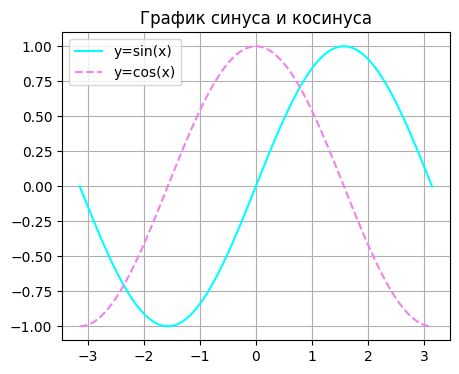

In [5]:
plt.figure(figsize=(5,4))
plt.plot(x, y_sin, color='aqua')
plt.plot(x, y_cos, color='violet', linestyle='--')
plt.title('График синуса и косинуса')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid()
plt.show()

In [6]:
# то что должно получиться

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [7]:
df = pd.read_csv(GERMAN_CREDIT)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [9]:
df['credit_risk'].value_counts()

credit_risk
good    700
bad     300
Name: count, dtype: int64

In [10]:
good_risk = df[df['credit_risk'] == 'good']
bad_risk = df[df['credit_risk'] == 'bad']

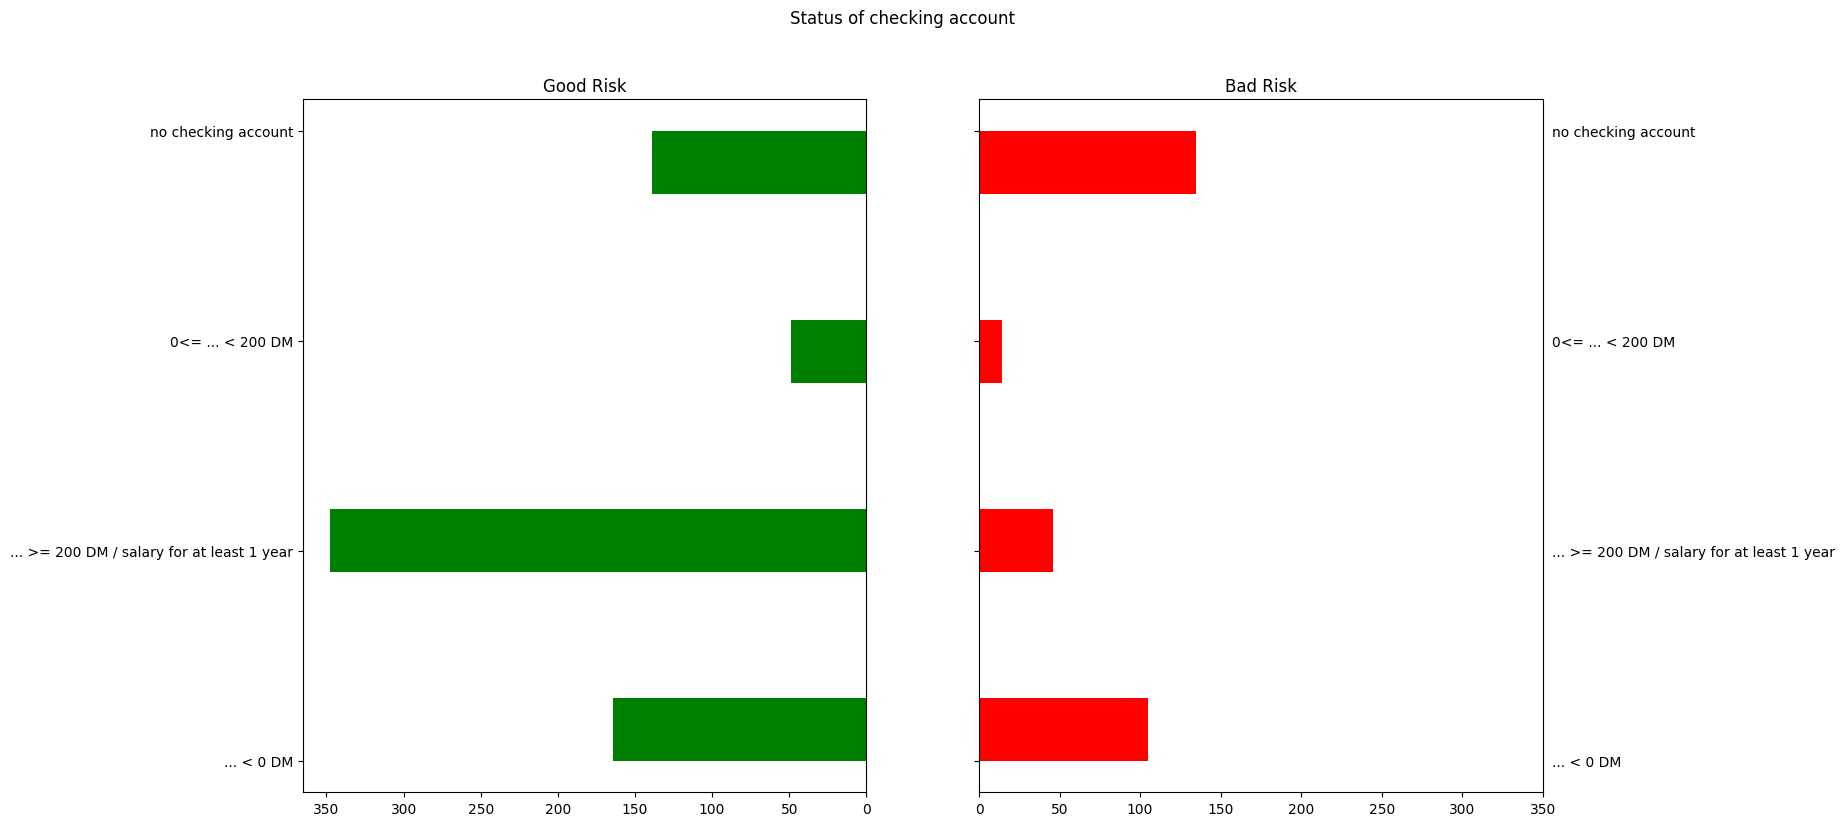

In [11]:
plt.figure(figsize=(16,9))
plt.suptitle('Status of checking account')
plt.subplot(1, 2, 1)
plt.hist(good_risk['status'].sort_values(), orientation='horizontal', color='g')
plt.title('Good Risk')
plt.gca().invert_xaxis()

plt.subplot(1, 2, 2)
plt.hist(bad_risk['status'].sort_values(), orientation='horizontal', color='r')
plt.tick_params(axis='y', labelright=True,  labelleft=False)
plt.xlim(0, 350)
plt.title('Bad Risk')
plt.show()

In [12]:
# то что должно получиться

### Задание 3  (0.5 балла)

In [13]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

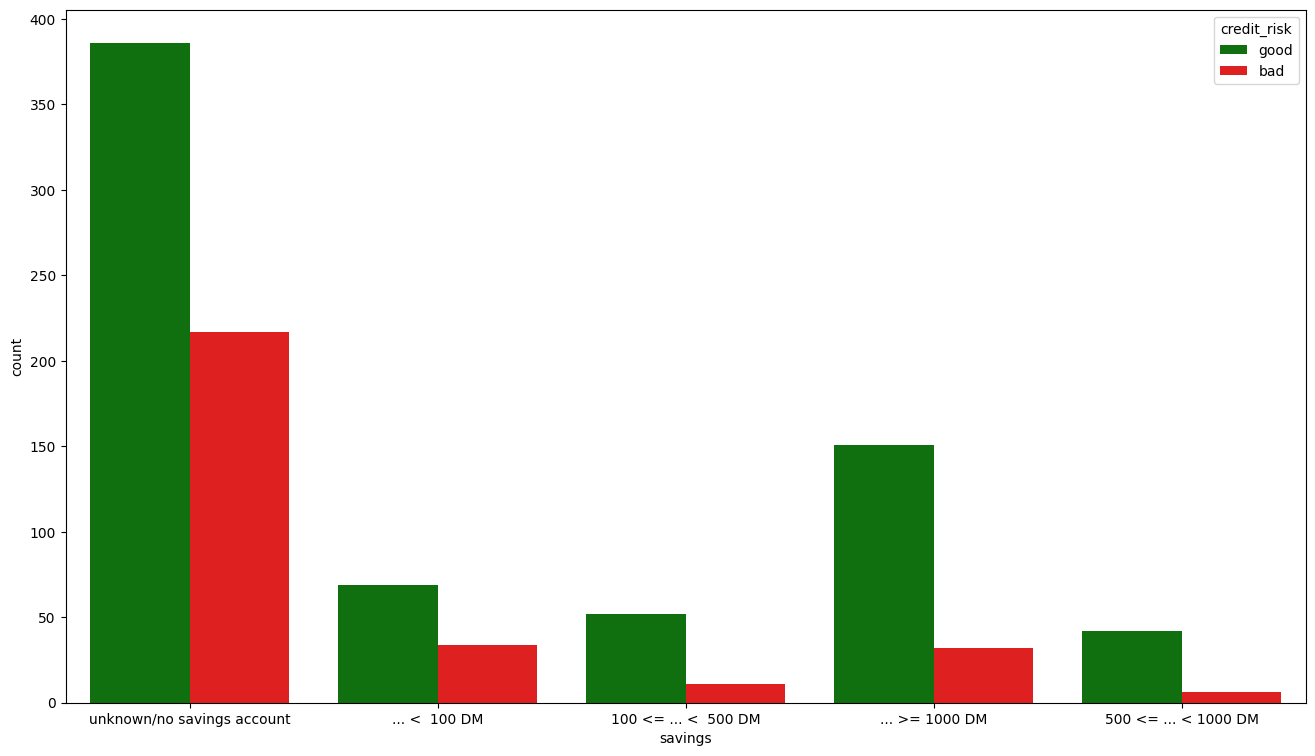

In [14]:
plt.figure(figsize=(16, 9))
sns.countplot(df, x='savings', hue='credit_risk', palette=['green', 'red'])
plt.show()

In [15]:
# то что должно получиться

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

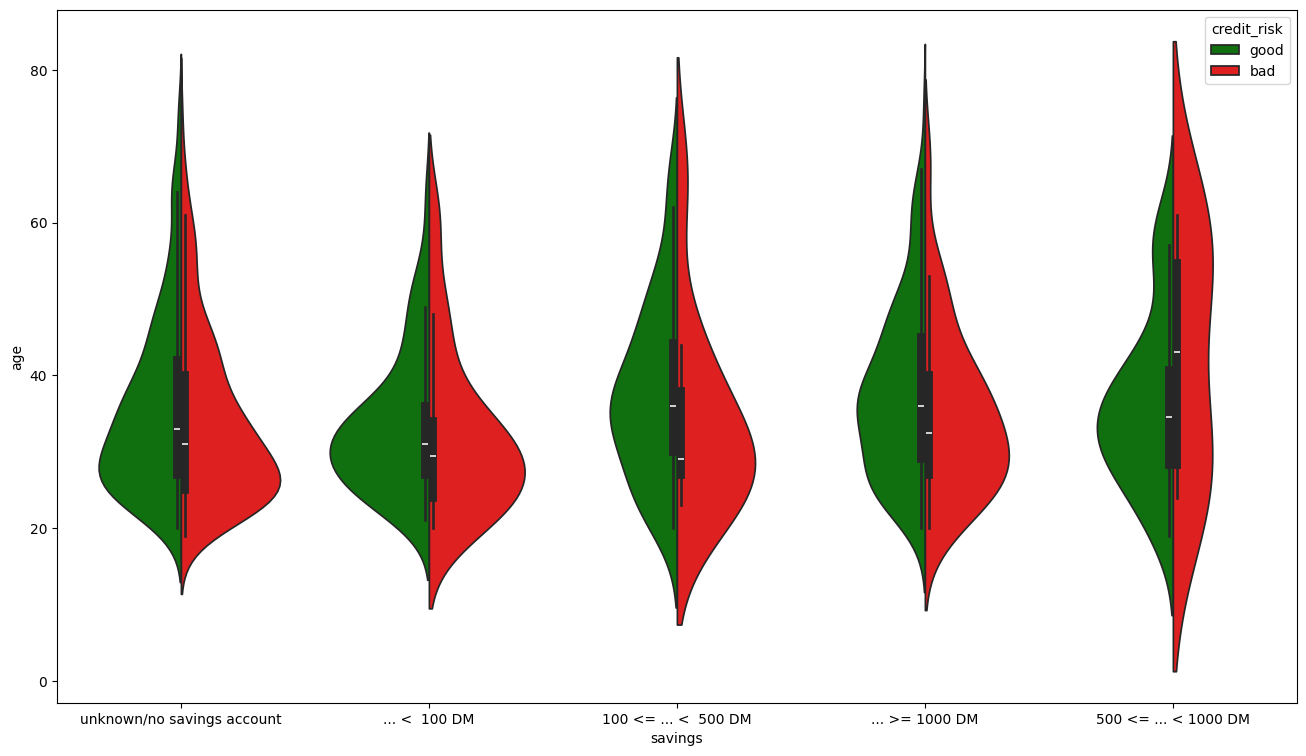

In [16]:
plt.figure(figsize=(16, 9))
sns.violinplot(df, x='savings', y='age', hue='credit_risk', palette=['green', 'red'], split=True, inner='box')
plt.show()

In [17]:
# то что должно получиться

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

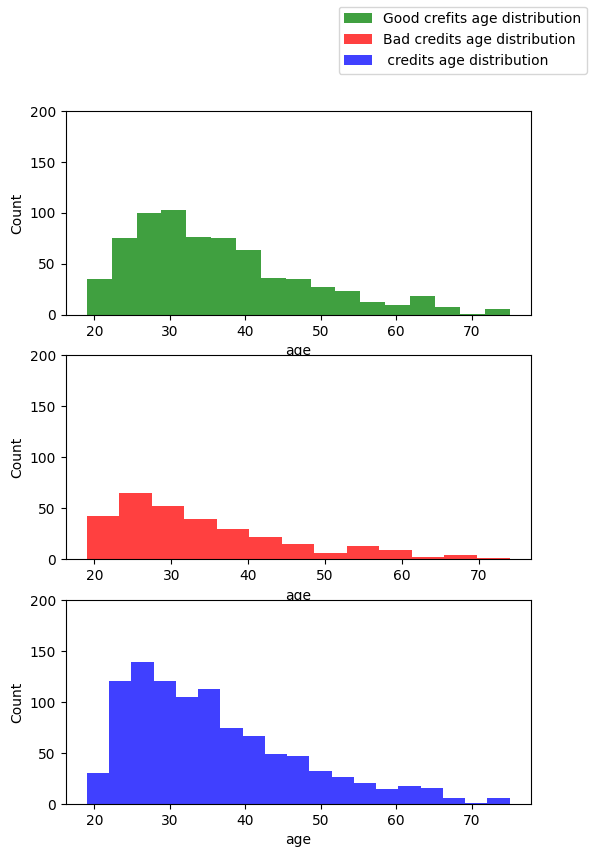

In [18]:
plt.figure(figsize=(6,9))

plt.subplot(3, 1, 1)
sns.histplot(good_risk['age'], color='g', edgecolor='none')
plt.ylim(0, 200)

plt.subplot(3, 1, 2)
sns.histplot(bad_risk['age'], color='r', edgecolor='none')
plt.ylim(0, 200)

plt.subplot(3, 1, 3)
sns.histplot(df['age'], color='b', edgecolor='none')
plt.ylim(0, 200)

plt.figlegend(['Good crefits age distribution', 'Bad credits age distribution', ' credits age distribution'])

plt.show()

In [19]:
# то что должно получиться

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

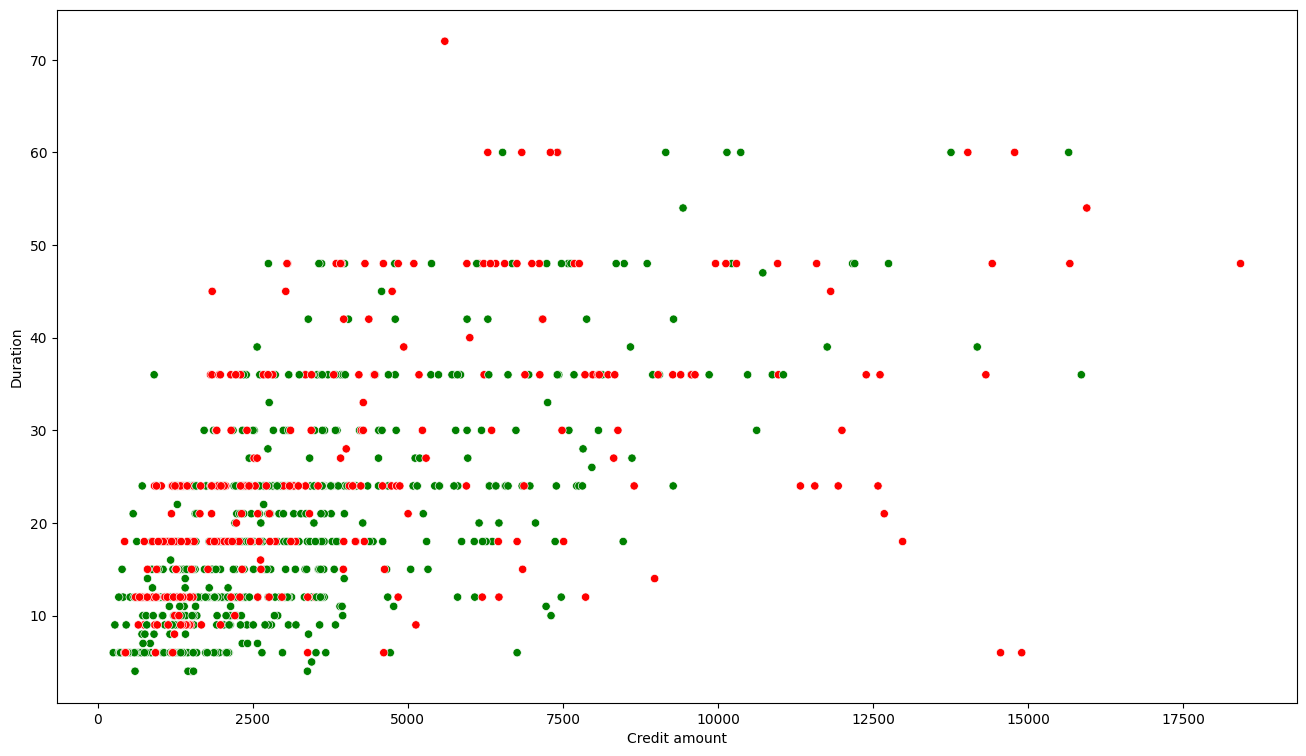

In [20]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='amount', y='duration', hue='credit_risk', palette=['green', 'red'], legend=False)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

In [21]:
# то что должно получиться

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

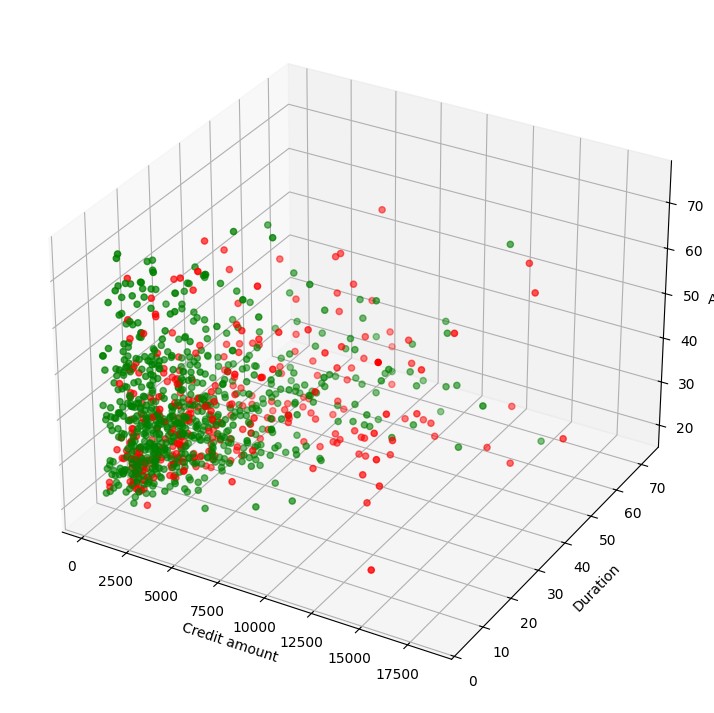

In [22]:
colors = ['g' if r == 'good' else 'r' for r in df['credit_risk']]


ax = plt.figure(figsize=(16,9)).add_subplot(projection='3d')
ax.scatter(xs=df['amount'], ys=df['duration'], zs=df['age'], color=colors)


ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

In [23]:
# то что должно получиться

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

**ВАШ ОТВЕТ**  
Преимущество 3-д состоит в том, что мы можем анализировать три переменные одновременно. Недостаток заключается в перегруженности полученного графика(разные цвета, точки смешаны друг с другом) и такой график сложнее интерпретировать. 2-д график легче интерпретировать и сравнивать.

Выводы:
* Наибольшая концентрация "плохих" рисков (красных точек) наблюдается в зоне, где сочетаются высокие суммы кредитов, длительные сроки погашения и экстремальные значения возраста (как очень молодые, так и пожилые заемщики)
* "Хорошие риски" (зеленые точки)наблюдается в зоне, где суммы кредитов небольшие, срок погашения короткий, а возраст средний

## Раздел 2. Визуализации в датасете Netflix

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

In [24]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов содержат пропуски в столбце `director`.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

In [25]:
df = pd.read_csv(NETFLIX_TITLES)

In [26]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [27]:
df['director'].isna().sum()

2389

In [28]:
df_nan = df[df['director'].isna()]

In [29]:
df_nan['country'].value_counts()

country
United States                                    717
United Kingdom                                   196
Japan                                            148
South Korea                                      139
India                                             75
                                                ... 
United States, India                               1
Chile, Italy                                       1
Canada, United Kingdom                             1
France, Australia, Germany                         1
United States, France, South Korea, Indonesia      1
Name: count, Length: 177, dtype: int64

фильм может быть снят несколькими странами. создадим список стран, разделив эти списки

In [30]:
countries_list = []

for countries in df_nan['country'].dropna():
    country_split = [country.strip() for country in str(countries).split(',')]
    countries_list.extend(country_split)

country_counts = pd.Series(countries_list).value_counts()
country_counts

United States           874
United Kingdom          249
Japan                   174
South Korea             149
Canada                  128
                       ... 
Austria                   1
Cuba                      1
Philippines               1
Mauritius                 1
United Arab Emirates      1
Name: count, Length: 65, dtype: int64

можно увидеть, что вместо Индии на пятом месте теперь Канада

In [68]:
top_5_countries = country_counts.head(5)
top_5_countries

United States     874
United Kingdom    249
Japan             174
South Korea       149
Canada            128
Name: count, dtype: int64

/var/folders/8j/mc9_cphn061_hkzb3mq8b3gm0000gn/T/ipykernel_47588/2953418001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_5_countries, palette=['r', 'black', 'black','black', 'black'])


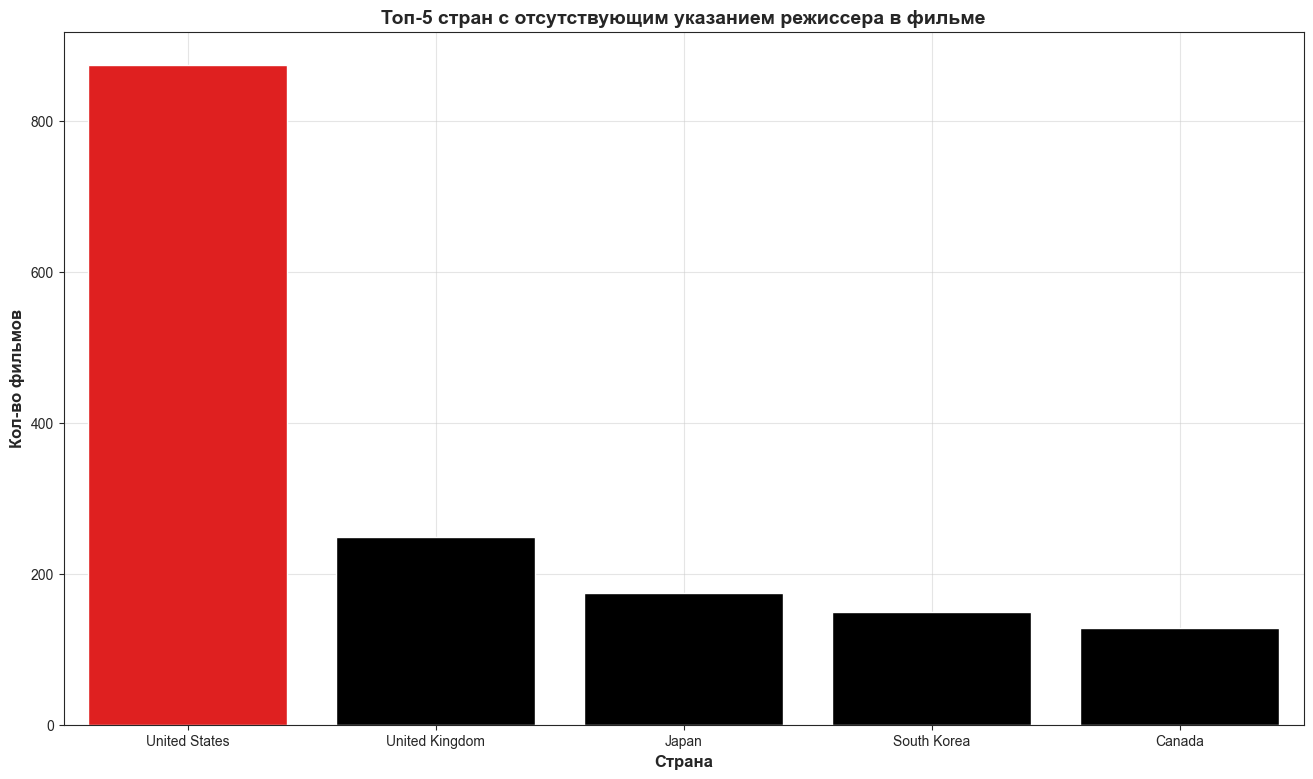

In [81]:
plt.figure(figsize=(16,9))
sns.barplot(top_5_countries, palette=['r', 'black', 'black','black', 'black'])
plt.title('Топ-5 стран с отсутствующим указанием режиссера в фильме', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12, fontweight='bold')
plt.ylabel('Кол-во фильмов', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5)
plt.show()

цветовая гамма типо Нетфликс..

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

In [83]:
all_countries = []

for countries in df['country'].dropna():
    countries_list = [country.strip() for country in str(countries).split(',')]
    all_countries.extend(countries_list)

country_counts = pd.Series(all_countries).value_counts()

top_5_countries = country_counts.head(5)

top_5_countries

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Name: count, dtype: int64

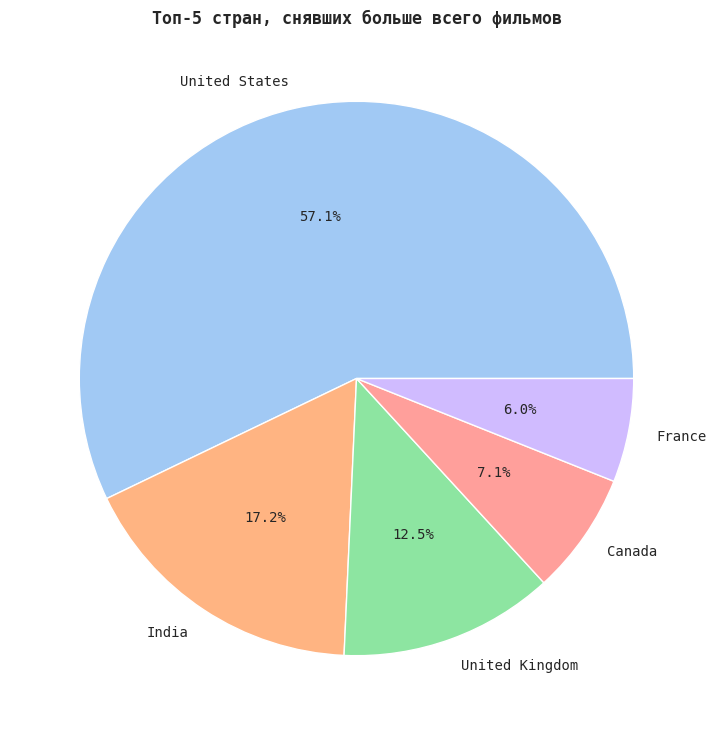

In [100]:
plt.figure(figsize=(16,9))
plt.title('Топ-5 стран, снявших больше всего фильмов', family = 'monospace', fontweight='bold')
plt.pie(
    top_5_countries,
    labels=top_5_countries.index,
    colors = sns.color_palette('pastel')[0:5],
    autopct='%1.1f%%',
    textprops={'fontfamily': 'monospace'}
)
plt.show()

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно.*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

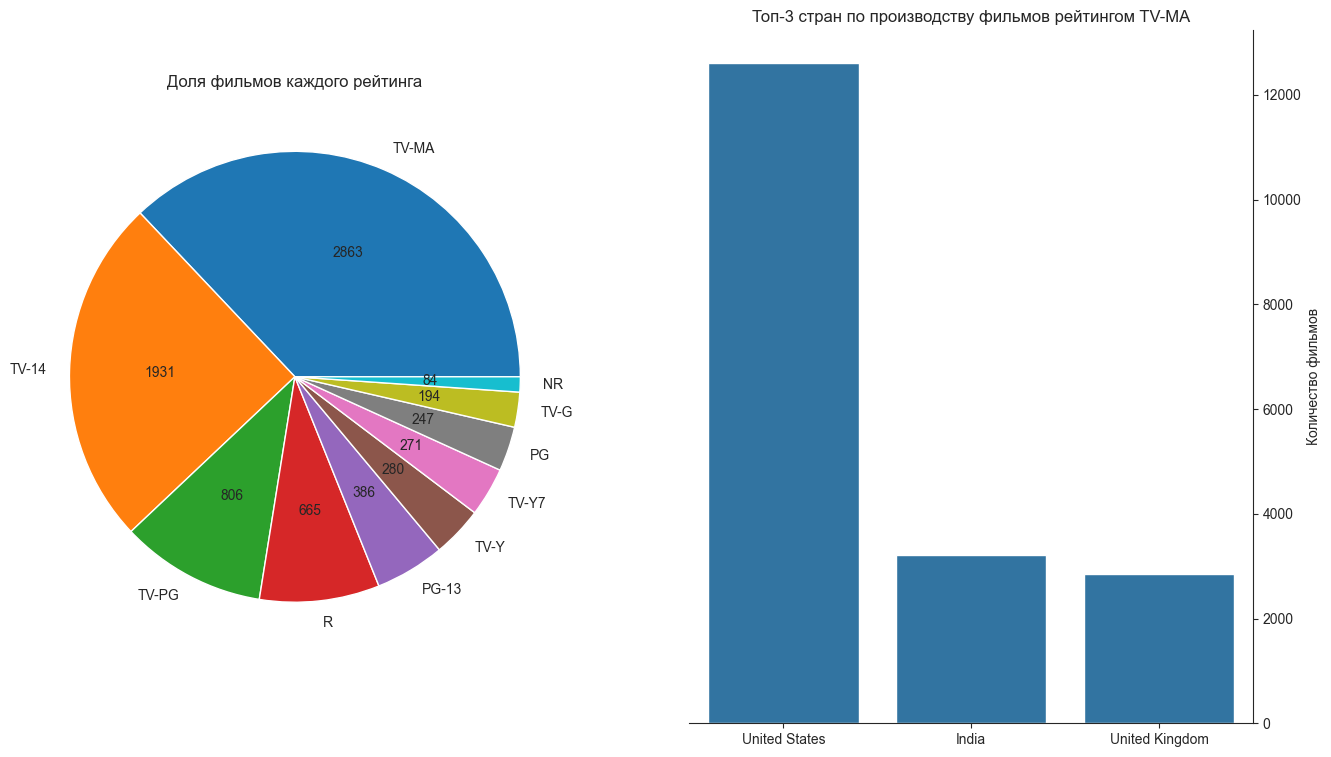

In [131]:
plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)

rating_counts = df['rating'].value_counts()
filtered_ratings = rating_counts[rating_counts >= 50]

labels = filtered_ratings.index
sizes = filtered_ratings.values

plt.pie(
    sizes,
    labels=labels,
    autopct=lambda x: f'{round(x/100 * sum(sizes),)}',
)
plt.title('Доля фильмов каждого рейтинга')

plt.subplot(1, 2, 2)

tv_ma_df = df[df['rating'] == 'TV-MA']

for countries in tv_ma_df['country'].dropna():
    countries_list = [country.strip() for country in str(countries).split(',')]
    all_countries.extend(countries_list)

country_counts = pd.Series(all_countries).value_counts()

top_3_countries = country_counts.head(3)

sns.barplot(top_3_countries)

plt.title('Топ-3 стран по производству фильмов рейтингом TV-MA')
plt.ylabel('Количество фильмов')

ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

In [185]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_avg = monthly_counts.groupby('month')['count'].mean().reset_index()

In [186]:
monthly_counts

,year,month,count
0,2008.0,1.0,1
1,2008.0,2.0,1
2,2009.0,5.0,1
3,2009.0,11.0,1
4,2010.0,11.0,1
...,...,...,...
95,2020.0,9.0,178
96,2020.0,10.0,173
97,2020.0,11.0,158
98,2020.0,12.0,175


In [187]:
monthly_avg

,month,count
0,1.0,84.111111
1,2.0,52.444444
2,3.0,95.571429
3,4.0,85.857143
4,5.0,67.875000
5,6.0,77.428571
6,7.0,85.714286
7,8.0,77.250000
8,9.0,68.777778
9,10.0,87.222222


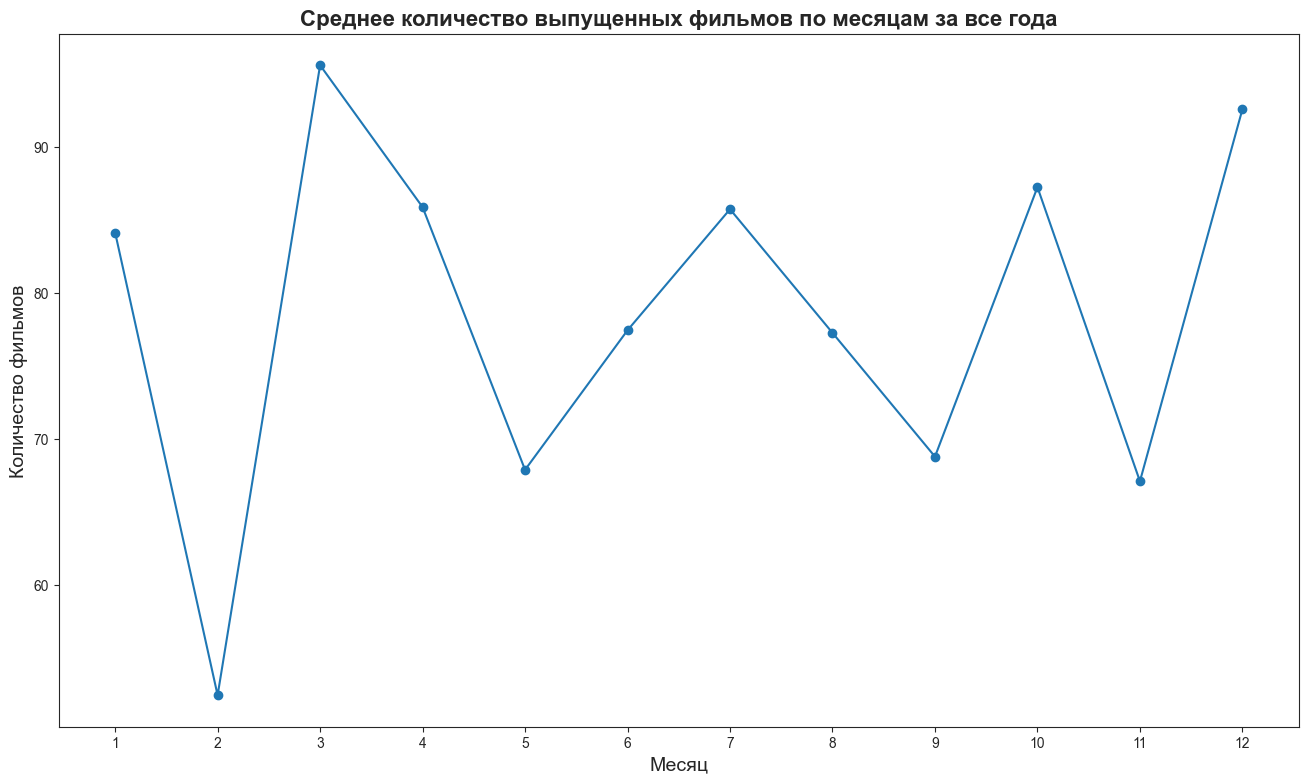

In [229]:
plt.figure(figsize=(16, 9))

plt.plot(monthly_avg['month'], monthly_avg['count'], marker='o')
plt.title('Среднее количество выпущенных фильмов по месяцам за все года', fontweight='bold', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество фильмов', fontsize=14)
plt.xticks(range(1, 13, 1))
plt.show()

### Задание 5 (1 балл)

Постройте линейный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

In [221]:
year_counts = pd.DataFrame(df['year'].value_counts().sort_index())
year_counts

,count
year,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,25
2015.0,88
2016.0,443


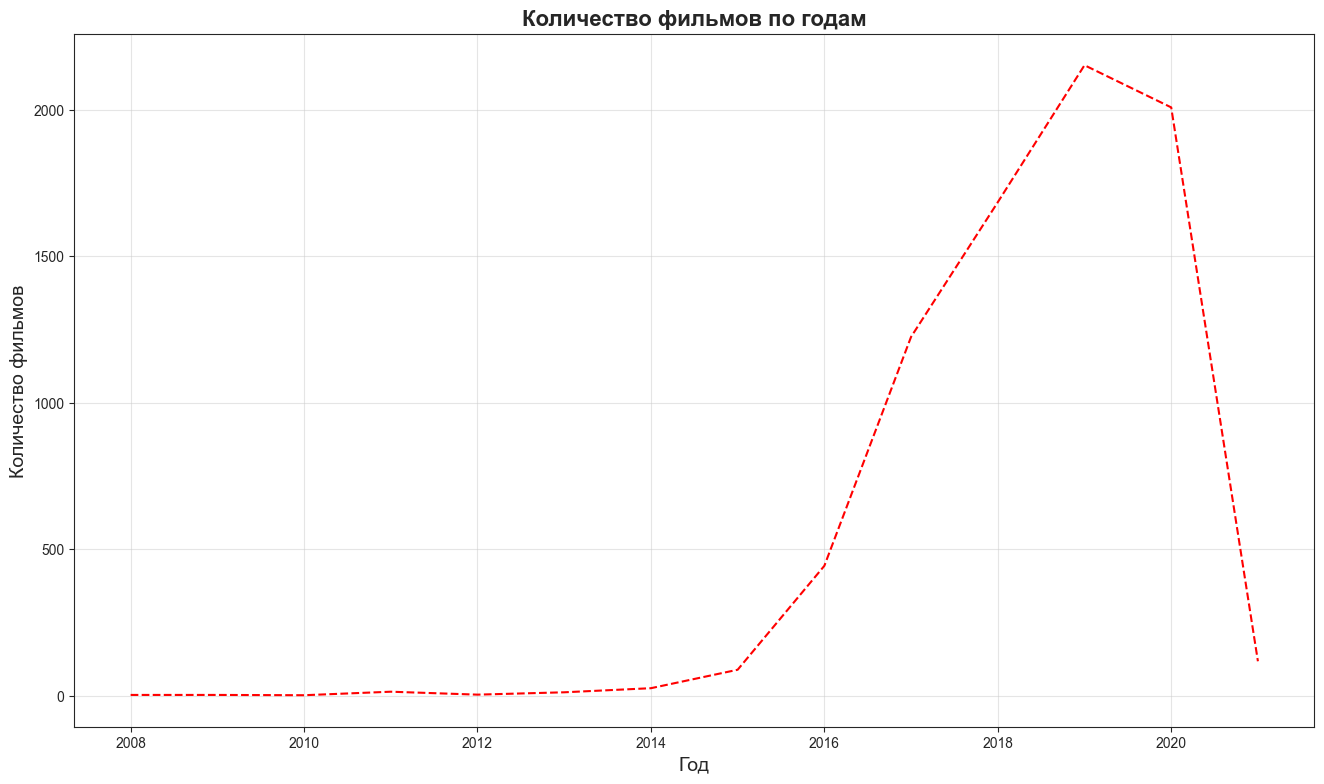

In [310]:
plt.figure(figsize=(16, 9))
plt.plot(year_counts, color='r', linestyle='--')
plt.title('Количество фильмов по годам', fontweight='bold', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество фильмов', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

In [296]:
df['min'] = df['duration'].apply(lambda x: x.split()[0] if x.strip().split()[-1] == 'min' else None)
df['season'] = df['duration'].apply(lambda x: x.split()[0] if x.strip().split()[-1] == 'Seasons' else None)
df['min'] = pd.to_numeric(df['min'])
df['season'] = pd.to_numeric(df['season'])

In [297]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,min,season
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0,2020.0,NaN,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,2016.0,93.0,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,2018.0,78.0,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,80.0,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,123.0,NaN


In [298]:
movies_df = df[df['type'] == 'Movie']
shows_df = df[df['type'] == 'TV Show']

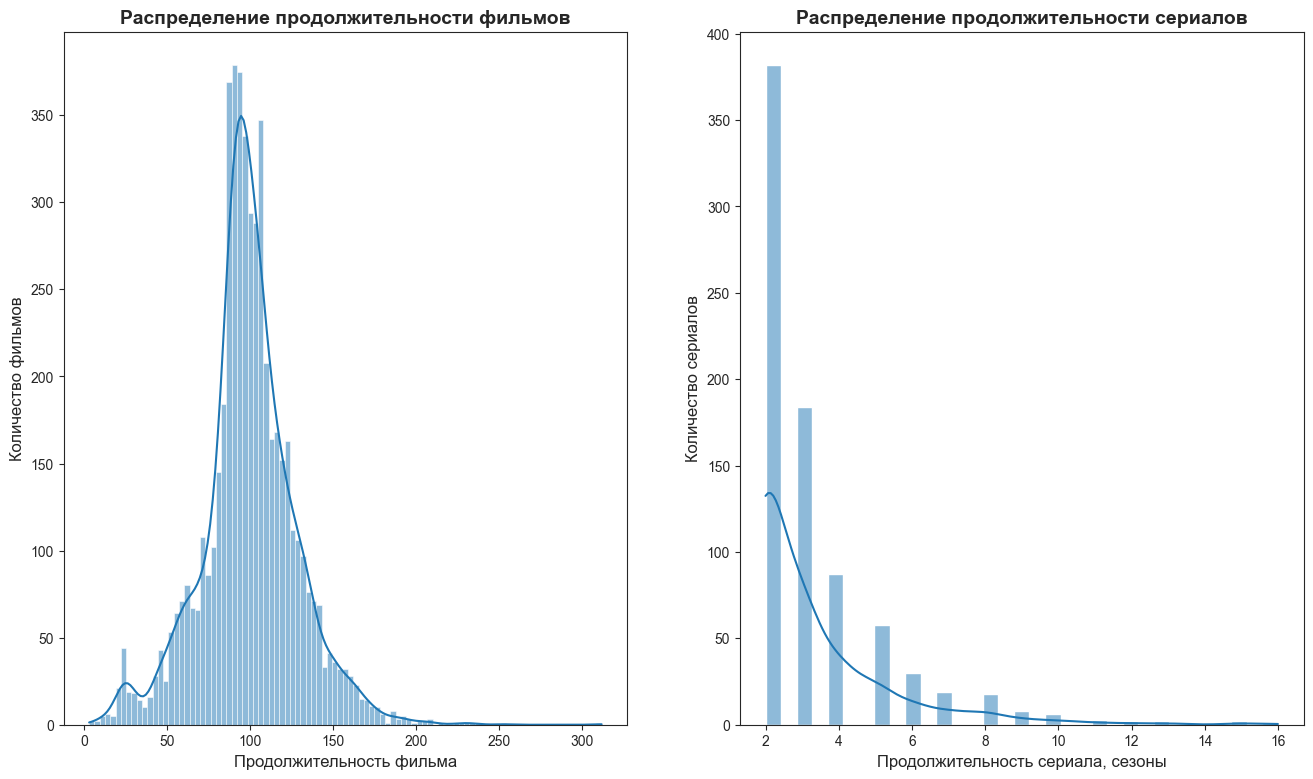

In [309]:
plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)

sns.histplot(movies_df['min'], kde=True)
plt.title('Распределение продолжительности фильмов', fontweight='bold', fontsize=14)
plt.xlabel('Продолжительность фильма', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)

plt.subplot(1, 2, 2)

sns.histplot(shows_df['season'], kde=True)
plt.title('Распределение продолжительности сериалов', fontweight='bold', fontsize=14)
plt.xlabel('Продолжительность сериала, сезоны', fontsize=12)
plt.ylabel('Количество сериалов', fontsize=12)
plt.show()

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

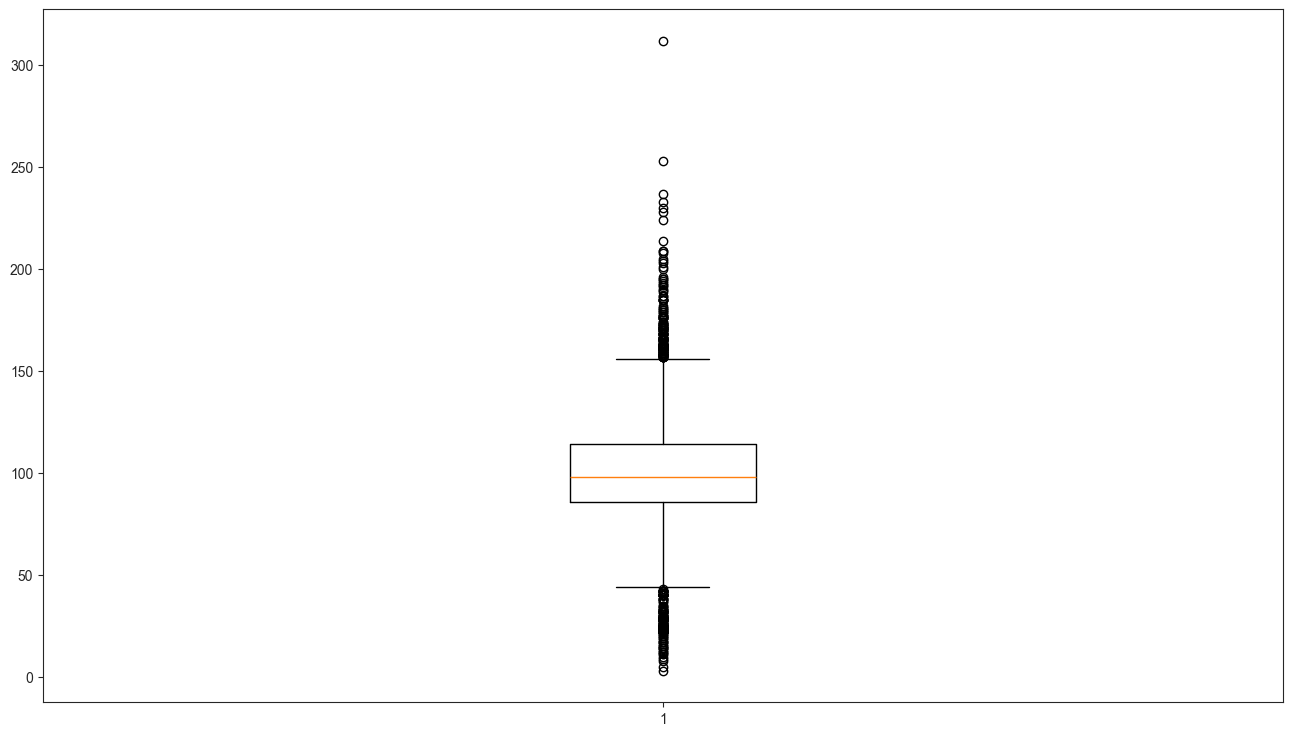

In [302]:
plt.figure(figsize=(16,9))
plt.boxplot(movies_df['min'])

plt.show()

* можно увидеть, что в данных очень много выбросов. возможно, на платформе представлено много короткометражных фильмов(выбросы снизу) и фильмов, которые идут более 2,5 часов. либо это ошибки в данных. ориентируясь только на ящик с усами, сложно сделать содержательный вывод о природе выбросов. 
* медианное значение составляет около 90 минут, т.е. 1,5 часов. 
* хронометраж 50% фильмов составляет примерно от 80 до 120 минут.
* минимальная длина фильма(не считая выбросов) - около 40 минут, максимальная - около 160 минут

### Задание 8* (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [ ]:
# ваш код здесь
...